In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv('Walmart DataSet.csv')

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
print(df.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [8]:
df.set_index('Date', inplace =True)

In [9]:
a= int(input("Enter the store id:"))
store = df[df.Store ==a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

Enter the store id:22


Weekly_Sales    float64
dtype: object

In [10]:
sales.head(20)

,Weekly_Sales
Date,
01-04-2011,951588.37
01-06-2012,1102857.37
01-07-2011,1077491.68
01-10-2010,905987.17
02-03-2012,974866.65
02-04-2010,1177340.99
02-07-2010,1120259.71
02-09-2011,912762.76
02-12-2011,1167621.14


In [11]:
# remove date from index to cgange its dtype because it isnt acceptable
sales.reset_index(inplace = True)

sales['Date'] = pd.to_datetime (sales['Date'])

sales.set_index('Date', inplace = True )

C:\Users\lalit\AppData\Local\Temp\ipykernel_16804\900591797.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales['Date'] = pd.to_datetime (sales['Date'])


#  a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?


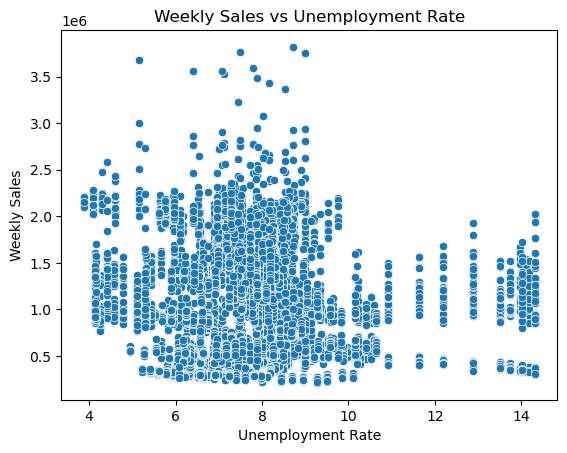

In [15]:
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

# b. If the weekly sales show a seasonal trend, when and what could be the reason?

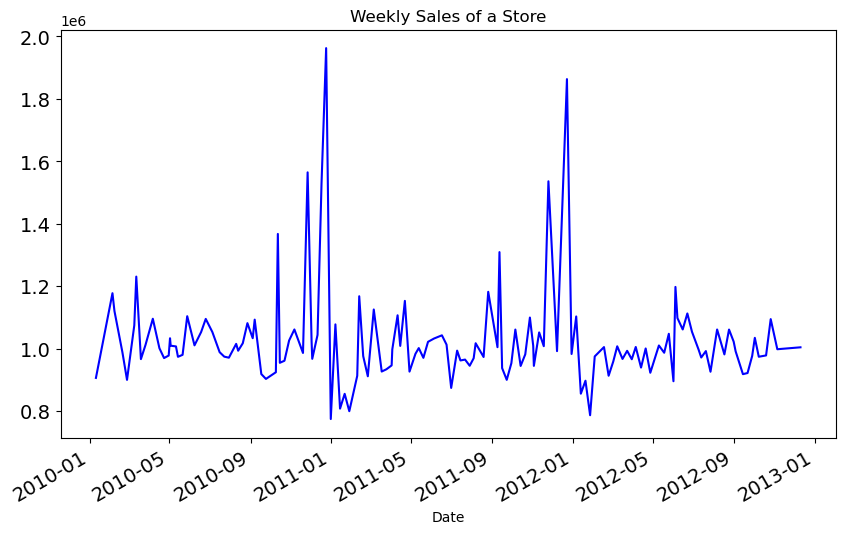

In [12]:
sales.Weekly_Sales.plot(figsize=(10,6), title = 'Weekly Sales of a Store', fontsize =14, color ='blue')
plt.show()

In [13]:
# # Inference: Seasonal trends in weekly sales can occur due to a variety of reasons, depending on the nature of the business and external factors. Here are some common reasons:

# Holidays and Special Events: Sales often spike during holidays such as Christmas, Thanksgiving, New Year's, Easter, etc. as well as during special events like Black Friday, Cyber Monday, or local festivals. People tend to increase their spending during these times.

# Weather: Weather can have a significant impact on consumer behavior. For example, sales of seasonal items like winter coats may increase during colder months, while sales of outdoor equipment might peak during warmer seasons.

# Seasonal Trends in Consumer Preferences: Some products are more popular during specific seasons. For example, ice cream sells better in the summer, while hot cocoa might be more popular in the winter.

# Promotional Activities: Sales may spike during certain promotional periods or sales events orchestrated by the business, such as clearance sales, anniversary sales, or product launches.

# Cultural or Religious Events: Sales patterns may be influenced by cultural or religious events specific to the region or demographic. For instance, sales of certain foods or decorations may increase during cultural festivals or religious holidays.

<Figure size 640x480 with 0 Axes>

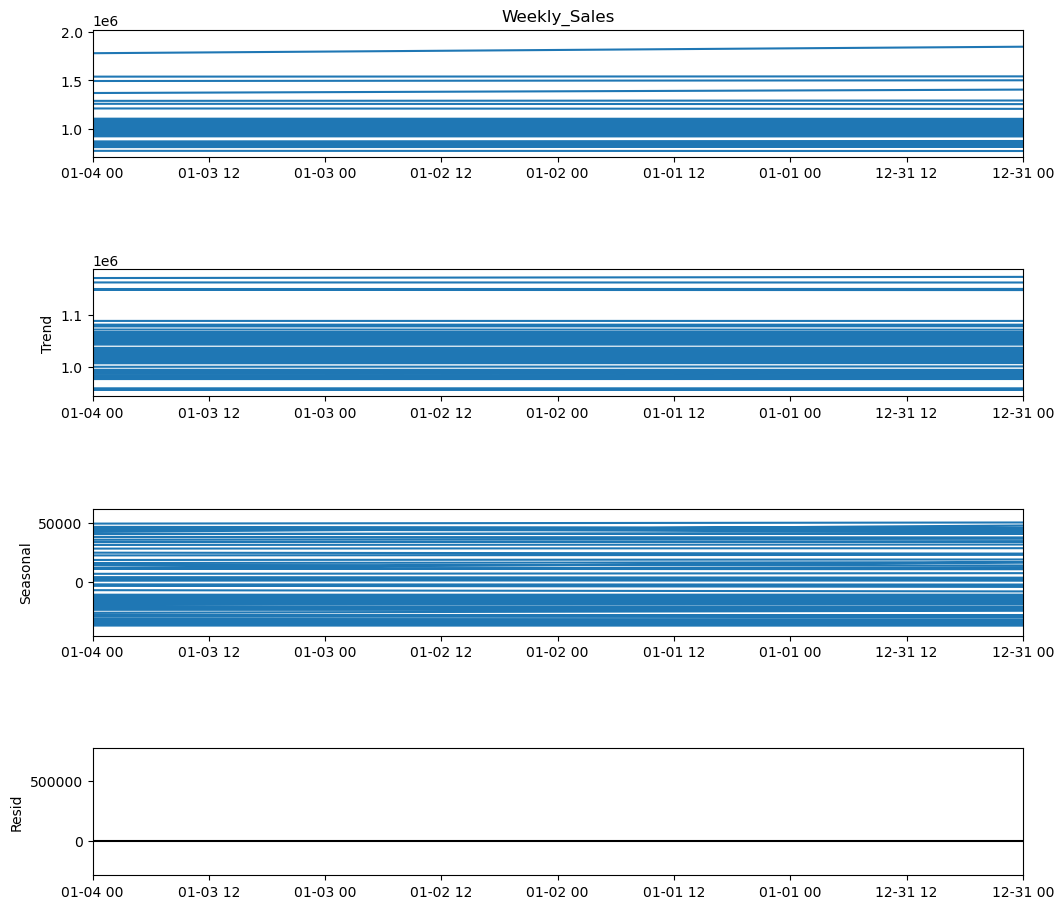

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales.Weekly_Sales, period =12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12,10)
plt.show()

In [16]:
# A higher unemployment indexwould generally result in a dip insales as individuals tend to decrease overall spending.
#  In our dataset, unemployment is presented through an index of the unemployment rate during that week in the region of the store.

# From our scatter plot, it is easier to gather the following information:

#  • For the given store types, there seems to be a visible decrease in sales when the unemployment index is higher than 10
#  • There seems to be a significant drop in sales when the unemployment index increases
#  • Highest recorded sales occur around the unemployment index of 6 to 9.

# c) Does temperature affect the weekly sales in any manner?

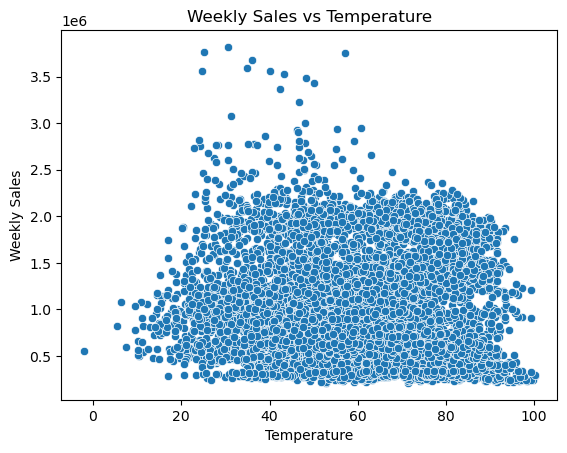

In [17]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

In [18]:
# Inference: 
# In the retail sector that weather has a profound effect on sales. While warmer weather promotes sales, cold/harsh or extremely hot weather is
#  generally not a great encouragement for shoppers to get outdoors and spend money.
#  Generally speaking, temperatures between 40 to 70 degrees Fahrenheit are considered
#  as favorable for humans to live in considering they are not as hot or cold.

#  As seen below, the highest sales occur for most store types between the range of
#  40 to 80 degrees Fahrenheit, thus proving the idea that pleasant weather encourages
#  higher sales. Sales are relatively lower for very low and very high temperatures but
#  seem to be adequately high for favorable climate conditions.

#  How is the Consumer Price index affecting the weekly sales of various stores?

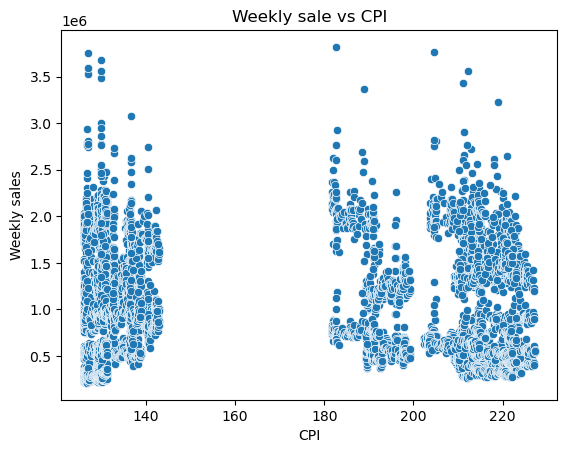

In [19]:
sns.scatterplot(x = 'CPI', y= 'Weekly_Sales', data= df)
plt.title('Weekly sale vs CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly sales')
plt.show()

In [20]:
# # Inference: According to the US Bureau of Labor Statistics, CPI (Consumer Price Index) is defined as the measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services (STATISTICS, n.d.). 
# A higher CPI generally means that the price of goods has increased and that an individual needs to spend more money to maintain the same standard of living.
#  In our scatter plot above, we can identify three different clusters around different ranges of CPI; while there seems to be no visible relationship between the change in CPI and weekly sales for Walmart stores (sales still occur at high CPI rates), the only negligible observation that can be made is the high amount of sales for stores when CPI is at a low rate of 140.



# Top performing stores according to the historical data.

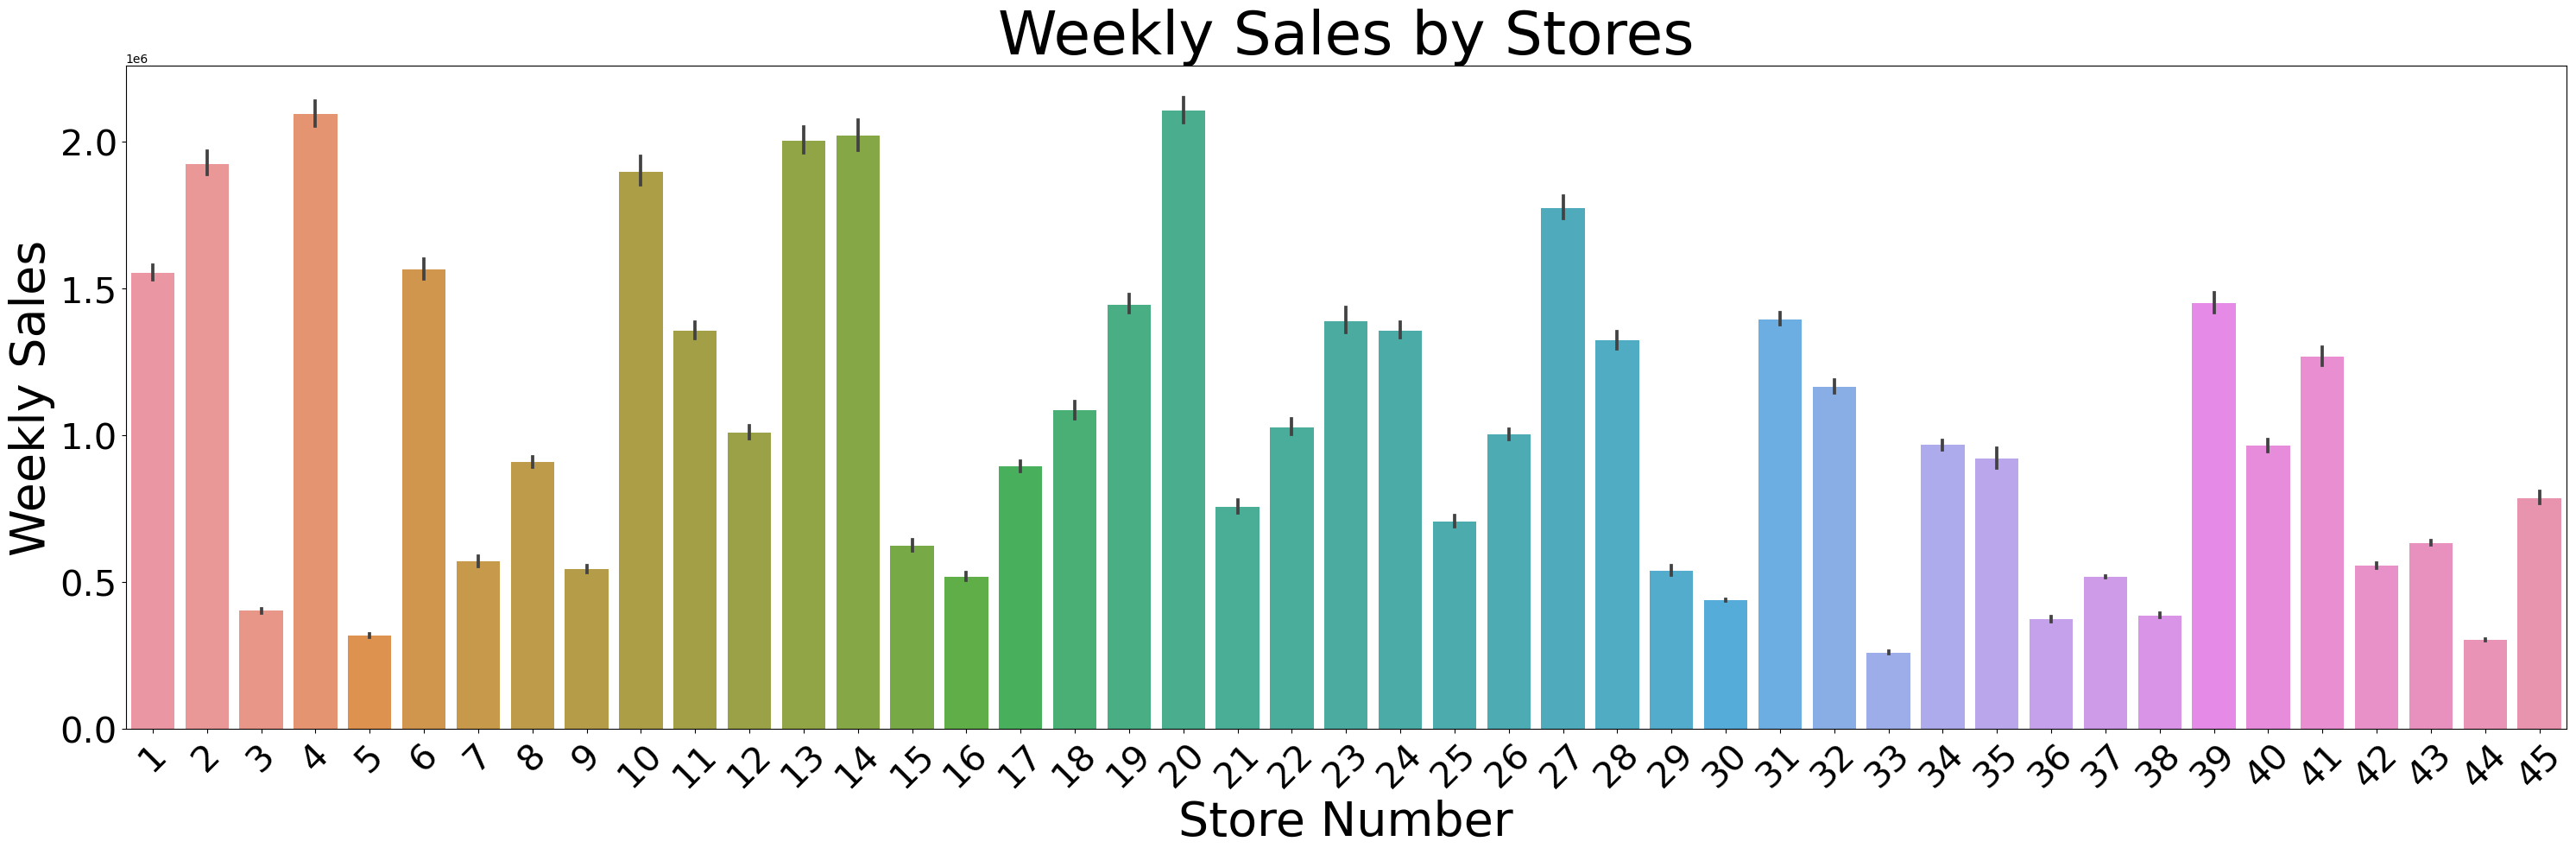

In [21]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

plt.xlabel('Store Number', fontsize=40)
plt.ylabel('Weekly Sales', fontsize=40)
plt.title('Weekly Sales by Stores', fontsize=50)

plt.xticks(rotation=45, fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()

In [22]:
# Inference:The histogram generated in the above Figure highlights the top store with highest revenue. As observed in the figure, it is certain that store 2, 4, 13, 14, 20 are the top revenue generating stores for Walmart.

# The worst performing store, and how significant is the difference between the highest and lowest performing stores.

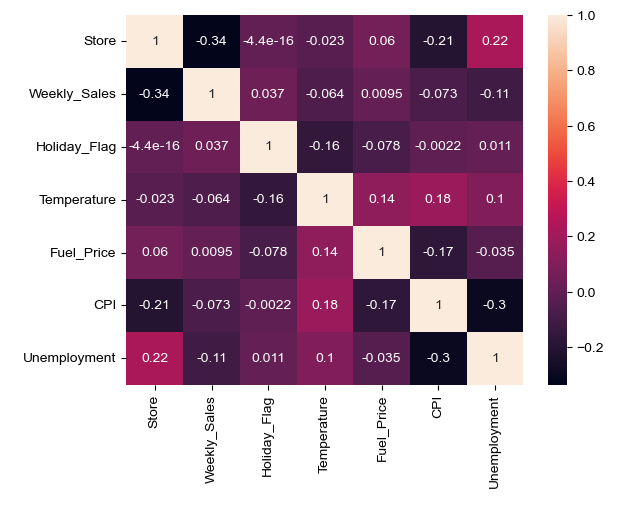

In [23]:
sns.heatmap(df.corr(), annot =True)
sns.set(rc = {'figure.figsize': (25,8)})

In [24]:
# Inference: Store 3, 5, 33 and 44 generate some of the lowest revenue for Walmart stores. 
# The difference between the highest and lowest performing stores can be quite significant. 
# The highest performing stores may be generating substantially more revenue, profit, or foot traffic compared to the lowest performing ones. 
# This difference can have significant implications for the company's overall financial performance, as well as its ability to meet targets and goals.
# For example, if the highest performing stores are consistently outperforming the lowest performing ones by a significant margin, it may indicate that there are opportunities for improvement in the underperforming stores, such as better merchandising, marketing strategies, operational efficiencies, or customer service initiatives.

# Addressing these disparities and striving for more consistent performance across all stores is often a key focus for large retail chains like Walmart, as it can help maximize overall profitability and competitiveness in the market. 
# Therefore, while the significance of the difference may vary, it is generally an important metric for retail companies to monitor and address.

# Model Building

In [25]:
#  lets compare the 2012 data of two stores
#  Lets take store  5 data for analysis

store5 = df[df.Store ==5]
#  There are about 45 different stores in the dataset

sales5 = pd.DataFrame(store5.Weekly_Sales.groupby(store5.index).sum())
sales5.dtypes

Weekly_Sales    float64
dtype: object

In [26]:
# Grouped weekly sales by store 6

# remove date from index to change its dtype because it clearly isnt acceptable
sales5.reset_index(inplace = True)


#  converting 'date' column to a datetime type
sales5['Date'] = pd.to_datetime(sales5['Date'])

# resetting date back to the index
sales5.set_index('Date', inplace =True)

C:\Users\lalit\AppData\Local\Temp\ipykernel_16804\2010436363.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales5['Date'] = pd.to_datetime(sales5['Date'])


In [27]:
y1 = sales.Weekly_Sales
y2 = sales5.Weekly_Sales

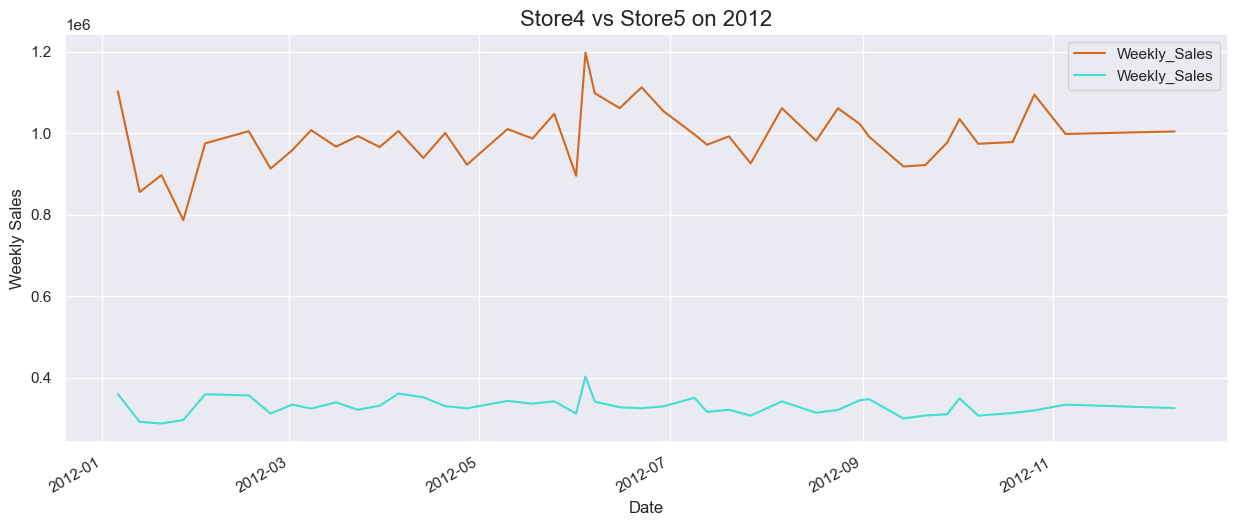

In [28]:
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store5 on 2012', fontsize = '16')
plt.show()

In [29]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)
import itertools
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [30]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\lalit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lalit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lalit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lalit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lalit\anaconda3\Lib\site-

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0991      0.321     -3.420      0.001      -1.729      -0.469
ar.L2         -1.0113      0.469     -2.155      0.031      -1.931      -0.091
ar.L3         -0.8302      0.392     -2.120      0.034      -1.598      -0.063
ar.L4         -0.6403      0.205     -3.131      0.002      -1.041      -0.239
ma.L1         -2.3768      0.348     -6.821      0.000      -3.060      -1.694
ma.L2          1.7734      0.692      2.564      0.010       0.418       3.129
ma.L3         -0.3940      0.357     -1.103      0.270      -1.094       0.306
ar.S.L52      -0.4565      0.192     -2.384      0.017      -0.832      -0.081
sigma2      1.142e+11   5.62e-12   2.03e+22      0.000    1.14e+11    1.14e+11


C:\Users\lalit\AppData\Local\Temp\ipykernel_16804\3809637464.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


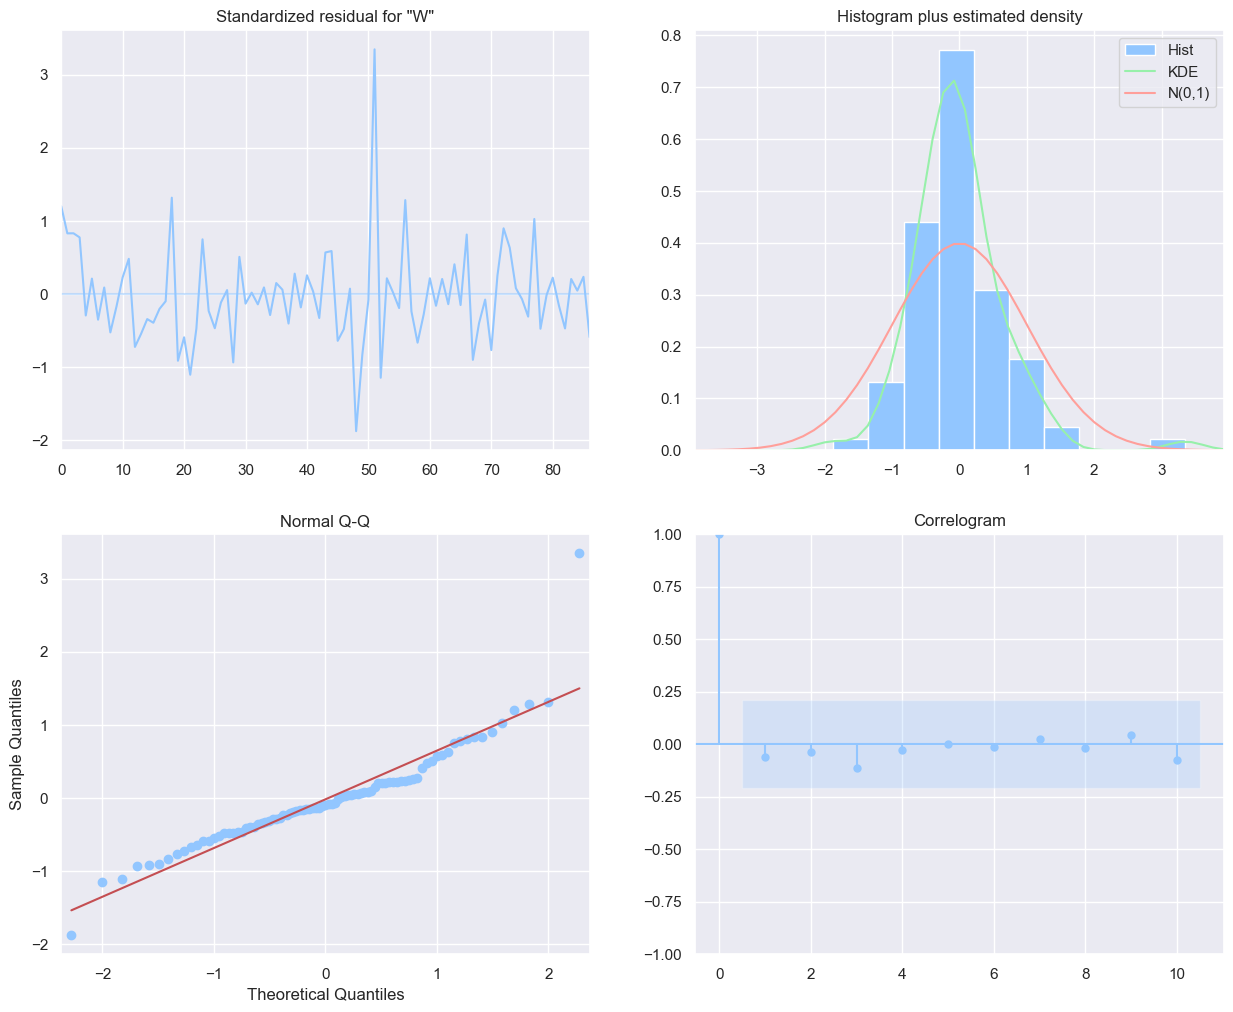

In [32]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [33]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

C:\Users\lalit\AppData\Local\Temp\ipykernel_16804\2689329424.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed')


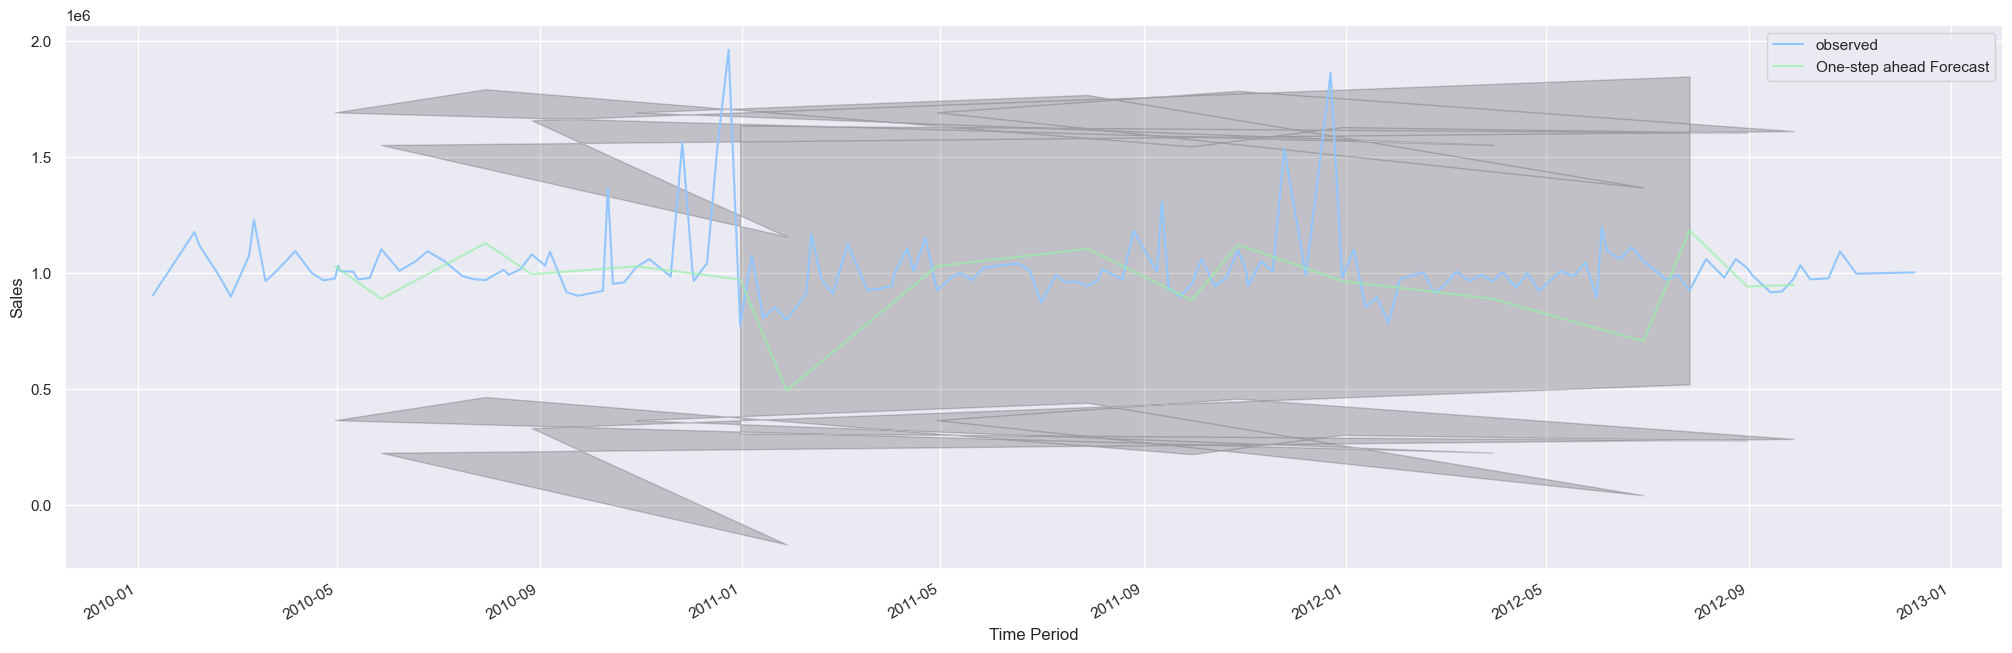

In [34]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [35]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 24688601500.13


In [36]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

C:\Users\lalit\AppData\Local\Temp\ipykernel_16804\628371500.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed', figsize=(12, 8))


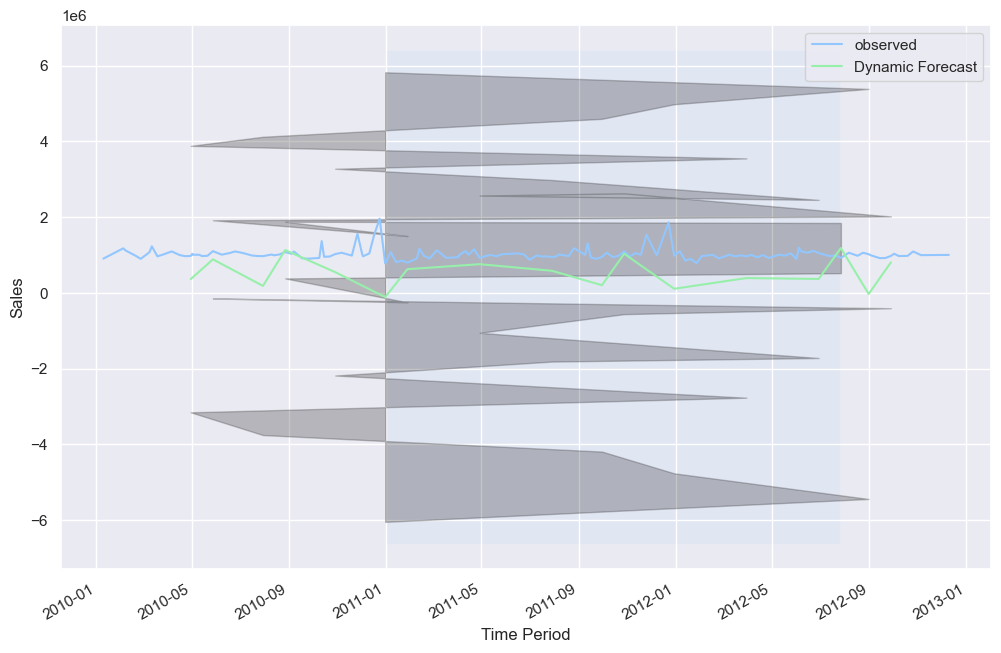

In [37]:
ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()



In [38]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

Date
2012-07-27    1.184553e+06
2010-08-27    1.131775e+06
2011-01-28    6.268133e+05
2010-05-28    8.861288e+05
2012-09-28    8.069408e+05
2011-10-28    1.034226e+06
2011-04-29    7.585062e+05
2012-06-29    3.686105e+05
2011-07-29    5.846118e+05
2010-10-29    5.489596e+05
2012-03-30    3.923436e+05
2010-04-30    3.653156e+05
2010-07-30    1.852361e+05
2011-09-30    2.035897e+05
2011-12-30    1.092893e+05
2012-08-31   -2.719663e+04
2010-12-31   -1.095235e+05
Name: predicted_mean, dtype: float64


In [39]:
y_truth = y1['2012-7-27':]

print(y_truth)

Date
2012-08-06    1061134.37
2012-09-03     991127.01
2012-10-02    1034448.07
2012-10-08     973812.79
2012-11-05     997868.63
2012-12-10    1004039.84
2012-09-14     918049.28
2012-08-17     981273.26
2012-10-19     978027.95
2012-09-21     921612.53
2012-08-24    1060906.75
2012-10-26    1094422.69
2012-07-27     925731.21
2012-09-28     976479.51
2012-08-31    1022270.86
Name: Weekly_Sales, dtype: float64


In [40]:
# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 631694.59


In [41]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 1477828.1107895283


In [42]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

C:\Users\lalit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [43]:
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

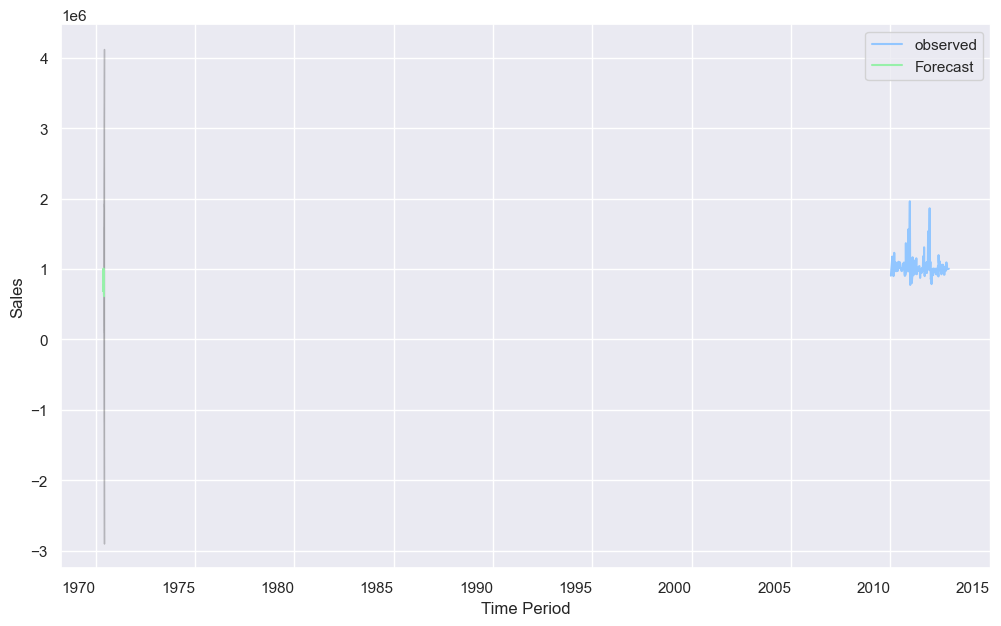

In [44]:
ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()
